In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Usuariosyconsumodeelectricidadpormunicipio_clean.csv", dtype={
    'Cve_Edo': 'string',
    'Cve_Inegi': 'string',
    'Cve_Mun': 'string',
    'Estado': 'string',
    'Municipio': 'string',
    'Tarifa': 'string',
    'Periodo': 'int64',
    'Usuarios': 'int64',
    'Consumo': 'float64',
    'ISO': 'string'
})
df.head()

,Cve_Edo,Cve_Inegi,Cve_Mun,Estado,Municipio,Tarifa,Periodo,Usuarios,Consumo,ISO
0,1,01,001,Aguascalientes,Aguascalientes,01,2010,231727,281228528.0,MX-AGU
1,1,01,001,Aguascalientes,Aguascalientes,1A,2010,0,0.0,MX-AGU
2,1,01,001,Aguascalientes,Aguascalientes,1B,2010,0,0.0,MX-AGU
3,1,01,001,Aguascalientes,Aguascalientes,1C,2010,0,0.0,MX-AGU
4,1,01,001,Aguascalientes,Aguascalientes,1D,2010,0,0.0,MX-AGU


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897120 entries, 0 to 897119
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Cve_Edo    897120 non-null  string 
 1   Cve_Inegi  524272 non-null  string 
 2   Cve_Mun    897120 non-null  string 
 3   Estado     897120 non-null  string 
 4   Municipio  897120 non-null  string 
 5   Tarifa     897120 non-null  string 
 6   Periodo    897120 non-null  int64  
 7   Usuarios   897120 non-null  int64  
 8   Consumo    897120 non-null  float64
 9   ISO        897120 non-null  string 
dtypes: float64(1), int64(2), string(7)
memory usage: 68.4 MB


In [13]:
def uniqueish_color(n):
    return plt.cm.gist_ncar(np.random.random(n))

<Axes: xlabel='Periodo'>

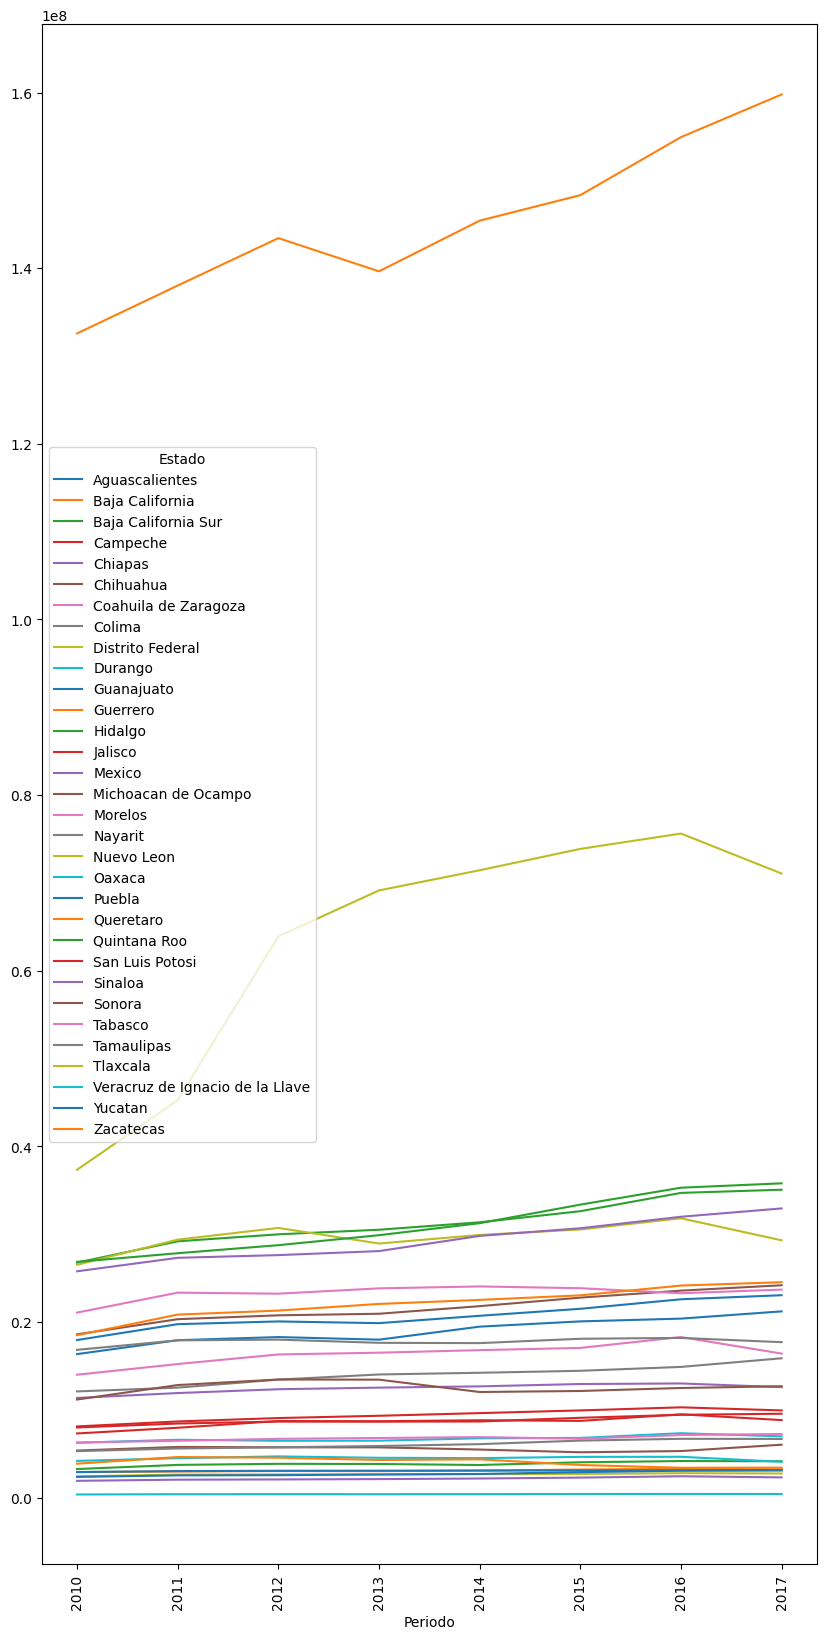

In [16]:
pd.pivot_table(df[df['Estado'] != "Nacional"].reset_index(),
               index='Periodo', columns='Estado', values='Consumo'
              ).plot(figsize=(10, 20,), rot=90)

<Axes: xlabel='Periodo'>

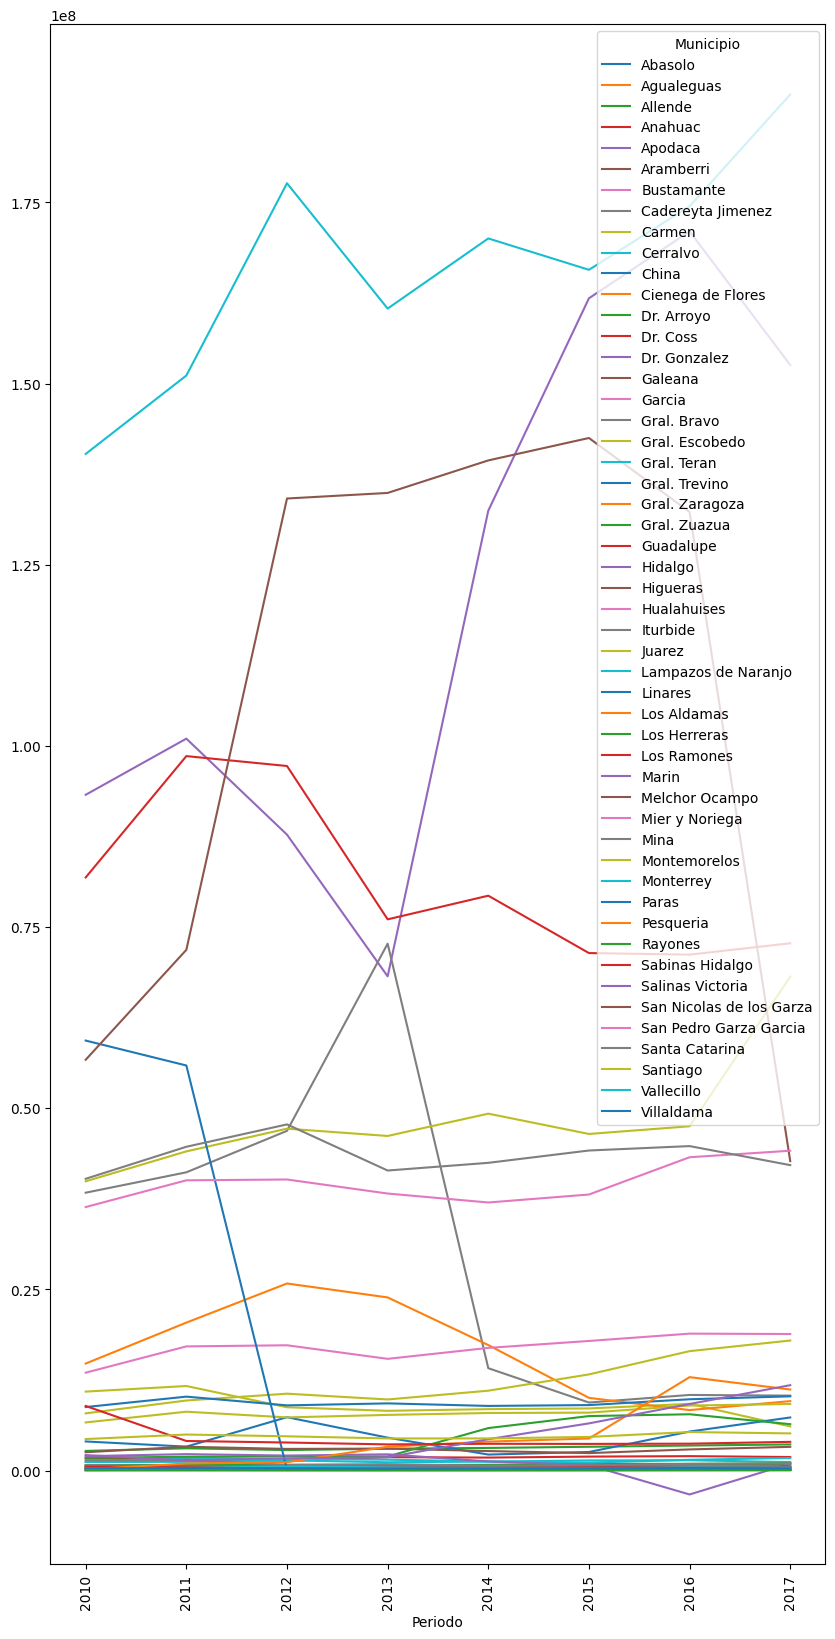

In [17]:
pd.pivot_table(df[(df['Estado'] == "Nuevo Leon") & (df['Municipio'] != "Total Estatal")].reset_index(),
               index='Periodo', columns='Municipio', values='Consumo'
              ).plot(figsize=(10, 20,), rot=90)

### tuturututu

In [ ]:
import plotly.express as px #Libraries to plot the results in Mexico's map
from urllib.request import urlopen
import json

In [10]:
with urlopen('https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json') as response:
    MXJSON = json.load(response)

In [17]:
consumo_por_estado = df[["Entidad Federativa", "Municipio", "Tarifa", "Periodo", "Usuarios", "Consumo", "ISO"]]\
.loc[(df["Entidad Federativa"] != "Nacional") & (df["Municipio"] == "Total Estatal") & (df["Periodo"] == 2017) & (df["Tarifa"] == "TOTAL")]
consumo_por_estado.head()

,Entidad Federativa,Municipio,Tarifa,Periodo,Usuarios,Consumo,ISO
785519,Aguascalientes,Total Estatal,TOTAL,2017,476381,2.863408e+09,MX-AGU
785789,Baja California,Total Estatal,TOTAL,2017,1306783,1.078570e+10,MX-BCN
786059,Baja California Sur,Total Estatal,TOTAL,2017,294443,2.366750e+09,MX-BCS
786599,Campeche,Total Estatal,TOTAL,2017,317974,1.340542e+09,MX-CAM
788354,Coahuila de Zaragoza,Total Estatal,TOTAL,2017,996738,1.039342e+10,MX-COA


In [18]:
fig = px.choropleth(consumo_por_estado, geojson=MXJSON, color="Consumo", 
                    locations="ISO", 
                    featureidkey="properties.id",
                    hover_name=consumo_por_estado["Entidad Federativa"],
                    hover_data={"ISO":False,
                               "Consumo":':>15,d'},
                    title="Consumo Total por Estado",
                    color_continuous_scale=px.colors.sequential.Blues,
                    labels={"Consumo":"Consumo ",
                           "ISO":"ISO",},
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()